# Clusterización del mercado político. 

In [1]:
!pip install kmodes


### Se imortan las librerías necesarias para poder trabajar 

In [2]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from matplotlib.pyplot import xticks

In [4]:
elecciones = pd.read_excel('C:/Users/Juan Carlos/Desktop/apuntes/Basededatosconcategorías.xlsx')
elecciones.head()

,Estado,Municipio,Sexo,Edad,Bloque_edad,Aprobación_presidencial,Aprobación_gobernador,Voto_en_2018,PAN_Percepción,PRI_Percepción,...,Utilizó_Facebook,Utilizó_Instagram,Utilizó_Youtube,Utilizó_Whatsapp,Beneficiario_programa_social,Escolaridad,Ocupación,Estado_civil,Tiene_hijos,AMAI-FINAL
0,BAJA CALIFORNIA,ENSENADA,Masculino,33,De 26 a 35 años,Aprueba mucho,Aprueba mucho,Partido Acción Nacional (PAN ),Muy buena,Muy mala,...,Sí,Sí,Sí,Sí,No,Secundaria incompleta,Profesionista independiente,Soltera/o,No,D
1,BAJA CALIFORNIA,TECATE,Femenino,22,De 18 a 25 años,Aprueba algo,Aprueba algo,No votó,Buena,Mala,...,Sí,Sí,Sí,Sí,No,Secundaria incompleta,Ama de casa,Soltera/o,Sí,D
2,BAJA CALIFORNIA,TECATE,Femenino,67,Más de 60 años,Desaprueba algo,Desaprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,...,Sí,No,Sí,Sí,No,Secundaria completa,Ama de casa,Viuda/o,Sí,D+
3,BAJA CALIFORNIA,TECATE,Femenino,38,De 36 a 45 años,Aprueba mucho,Aprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,...,Sí,No,No,Sí,Sí,Preparatoria completa,Trabajador por cuenta propia,Casada/o,Sí,C-
4,BAJA CALIFORNIA,TIJUANA,Masculino,35,De 26 a 35 años,Desaprueba algo,Desaprueba mucho,Movimiento Regeneración Nacional (MORENA),Mala,Mala,...,Sí,No,Sí,Sí,No,Posgrado,No responde,Casada/o,Ns/nc,No responde


se analizan las columnas para corroborar que no haya más datos que limpiar

In [5]:
elecciones.columns

Index(['Estado', 'Municipio', 'Sexo', 'Edad', 'Bloque_edad',
       'Aprobación_presidencial', 'Aprobación_gobernador', 'Voto_en_2018',
       'PAN_Percepción', 'PRI_Percepción', 'PRD_Percepción', 'PV_Percepción',
       'PT_Percepción', 'MC_Percepción', 'MORENA_Percepción', 'PES_Percepción',
       'RSP_Percepción', 'FxM_Percepción', 'Preferencia_PAN',
       'Preferencia_PRI', 'Preferencia_PRD', 'Preferencia_PV',
       'Preferencia_PT', 'Preferencia_MC', 'Preferencia_MORENA',
       'Preferencia_PES', 'Preferencia_RSP', 'Preferencia_FxM',
       'Partido_no_votaría', 'Identidad_partidista', 'Fecha_de_la_elección',
       'Nivel_de_Participación', 'Semáforo_rojo', 'Semáforo_naranja',
       'Semáforo_amarillo', 'Confianza_INE', 'Confianza_TRIFE',
       'Confianza_televisoras', 'Confianza_periódicos',
       'Confianza_redes_sociales', 'Confianza_Cámara_de_Diputados',
       'Confianza_Guardia_nacional', 'Confianza_ejército', 'Confianza_polícía',
       'Confianza_jueces', 'Utiliza_i

In [6]:
elecciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Estado                         1980 non-null   object
 1   Municipio                      1980 non-null   object
 2   Sexo                           1980 non-null   object
 3   Edad                           1980 non-null   int64 
 4   Bloque_edad                    1980 non-null   object
 5   Aprobación_presidencial        1980 non-null   object
 6   Aprobación_gobernador          1980 non-null   object
 7   Voto_en_2018                   1980 non-null   object
 8   PAN_Percepción                 1980 non-null   object
 9   PRI_Percepción                 1980 non-null   object
 10  PRD_Percepción                 1980 non-null   object
 11  PV_Percepción                  1980 non-null   object
 12  PT_Percepción                  1980 non-null   object
 13  MC_

Eliminamos la columna de Edad, pues sólo utilizaremos la columna que separa a la población por bloques

In [7]:
elecciones.drop('Edad', axis=1, inplace=True)

In [8]:
elecciones.shape

(1980, 56)

In [13]:
elecciones.isnull().sum()

Estado                           0
Municipio                        0
Sexo                             0
Bloque_edad                      0
Aprobación_presidencial          0
Aprobación_gobernador            0
Voto_en_2018                     0
PAN_Percepción                   0
PRI_Percepción                   0
PRD_Percepción                   0
PV_Percepción                    0
PT_Percepción                    0
MC_Percepción                    0
MORENA_Percepción                0
PES_Percepción                   0
RSP_Percepción                   0
FxM_Percepción                   0
Preferencia_PAN                  0
Preferencia_PRI                  0
Preferencia_PRD                  0
Preferencia_PV                   0
Preferencia_PT                   0
Preferencia_MC                   0
Preferencia_MORENA               0
Preferencia_PES                  0
Preferencia_RSP                  0
Preferencia_FxM                  0
Partido_no_votaría               0
Identidad_partidista

Se ha comprobado que el dataframe no contiene más elemenos nulos

In [14]:
# Prepario una copia de los datos 
elecciones_copia = elecciones.copy()

## Ejecución del modelo kmodes

1 )  Se codifica todo el dataframe, convirtiendo todas las etiquetas en números. 

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
elecciones= elecciones.apply(le.fit_transform)
elecciones.head()

,Estado,Municipio,Sexo,Bloque_edad,Aprobación_presidencial,Aprobación_gobernador,Voto_en_2018,PAN_Percepción,PRI_Percepción,PRD_Percepción,...,Utilizó_Facebook,Utilizó_Instagram,Utilizó_Youtube,Utilizó_Whatsapp,Beneficiario_programa_social,Escolaridad,Ocupación,Estado_civil,Tiene_hijos,AMAI-FINAL
0,1,48,1,1,2,2,9,3,4,4,...,2,2,2,2,0,12,9,3,0,4
1,1,136,0,0,1,1,6,1,2,4,...,2,2,2,2,0,12,1,3,2,4
2,1,136,0,4,3,3,9,1,2,0,...,2,0,2,2,0,11,1,5,2,5
3,1,136,0,2,2,1,9,1,2,1,...,2,0,0,2,2,7,12,0,2,3
4,1,144,1,1,3,4,3,2,2,2,...,2,0,2,2,0,6,0,0,1,7


2 ) Se improta la libreria de kmodes

In [19]:
from kmodes.kmodes import KModes

In [20]:
km_cao= KModes(n_clusters=2, init= "Cao", n_init= 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(elecciones)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 301, cost: 55359.0
Run 1, iteration: 2/100, moves: 128, cost: 55223.0
Run 1, iteration: 3/100, moves: 21, cost: 55223.0


In [21]:
fitClusters_cao

array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [22]:
clusterCentroidsDf= pd.DataFrame(km_cao.cluster_centroids_)

In [23]:
clusterCentroidsDf.columns=elecciones.columns

In [24]:
clusterCentroidsDf.head()

,Estado,Municipio,Sexo,Bloque_edad,Aprobación_presidencial,Aprobación_gobernador,Voto_en_2018,PAN_Percepción,PRI_Percepción,PRD_Percepción,...,Utilizó_Facebook,Utilizó_Instagram,Utilizó_Youtube,Utilizó_Whatsapp,Beneficiario_programa_social,Escolaridad,Ocupación,Estado_civil,Tiene_hijos,AMAI-FINAL
0,16,65,0,3,2,4,3,2,2,2,...,2,0,2,2,0,11,1,0,2,4
1,16,57,0,0,1,1,3,1,1,1,...,2,0,2,2,0,11,1,3,2,4


In [25]:
km_huang = KModes(n_clusters=2, init="Huang", n_init=1, verbose=1)
fitClusters_huang = km_huang.fit_predict(elecciones)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 480, cost: 55084.0
Run 1, iteration: 2/100, moves: 163, cost: 55033.0
Run 1, iteration: 3/100, moves: 27, cost: 55033.0


In [26]:
fitClusters_huang

array([1, 0, 0, ..., 1, 1, 0], dtype=uint16)

In [27]:
fitClusters_huang

array([1, 0, 0, ..., 1, 1, 0], dtype=uint16)

## Para encontrar el número de cluster más adecuado utilizamos el método del codo, el cual evaluará el dataframe.  

In [30]:
cost = []
for num_clusters in list(range(2, 9)):
    kmode = KModes(n_clusters=num_clusters, init = 'Cao', n_init=1, verbose = 1)
    kmode.fit_predict(elecciones)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 301, cost: 55359.0
Run 1, iteration: 2/100, moves: 128, cost: 55223.0
Run 1, iteration: 3/100, moves: 21, cost: 55223.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 499, cost: 53000.0
Run 1, iteration: 2/100, moves: 187, cost: 52945.0
Run 1, iteration: 3/100, moves: 96, cost: 52832.0
Run 1, iteration: 4/100, moves: 101, cost: 52699.0
Run 1, iteration: 5/100, moves: 64, cost: 52657.0
Run 1, iteration: 6/100, moves: 72, cost: 52593.0
Run 1, iteration: 7/100, moves: 9, cost: 52593.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 583, cost: 51477.0
Run 1, iteration: 2/100, moves: 175, cost: 51402.0
Run 1, iteration: 3/100, moves: 39, cost: 51402.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100,

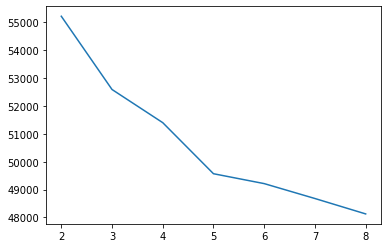

In [29]:
y = np.array([i for i in range(2,9)])
plt.plot(y,cost)

Al ajecutral el método del codo por primera vez, todo parece indicar, por la curvatura de la línea, que la cantidad de clusters más adecuada es cinco. No obstante, utilizaremos el método de Yellowbrick con la finalidad de asegurarnos que esa sea la cantidad ideal de clusters para la ejecución de nuestro modelo. 

In [32]:
!pip install yellowbrick

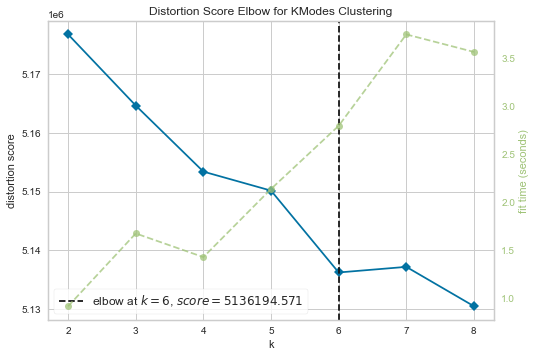

<AxesSubplot:title={'center':'Distortion Score Elbow for KModes Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KModes()
visualizer = KElbowVisualizer(model, k=(2,9))

visualizer.fit(elecciones)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Después de evaluar con el método de Yelowbrick nos percatamos que la cantidad ideal de Clusters para el dataframe es de 6

In [35]:
km_huang = KModes(n_clusters=6, init="Huang", n_init=1, verbose=1)
fitClusters_huang = km_huang.fit_predict(elecciones)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 755, cost: 50702.0
Run 1, iteration: 2/100, moves: 326, cost: 50493.0
Run 1, iteration: 3/100, moves: 251, cost: 50230.0
Run 1, iteration: 4/100, moves: 206, cost: 50050.0
Run 1, iteration: 5/100, moves: 142, cost: 49964.0
Run 1, iteration: 6/100, moves: 84, cost: 49890.0
Run 1, iteration: 7/100, moves: 52, cost: 49877.0
Run 1, iteration: 8/100, moves: 9, cost: 49877.0


## A continuación, se combinan los clusters con el dataframe original

In [36]:
elecciones = elecciones_copia.reset_index()

In [37]:
clustersDF = pd.DataFrame(fitClusters_huang)
clustersDF.columns = ['cluster_predicted']
combinedDF = pd.concat([elecciones, clustersDF], axis=1).reset_index()
combinedDF = combinedDF.drop(['index', 'level_0'], axis = 1)

In [38]:
combinedDF.head()

,Estado,Municipio,Sexo,Bloque_edad,Aprobación_presidencial,Aprobación_gobernador,Voto_en_2018,PAN_Percepción,PRI_Percepción,PRD_Percepción,...,Utilizó_Instagram,Utilizó_Youtube,Utilizó_Whatsapp,Beneficiario_programa_social,Escolaridad,Ocupación,Estado_civil,Tiene_hijos,AMAI-FINAL,cluster_predicted
0,BAJA CALIFORNIA,ENSENADA,Masculino,De 26 a 35 años,Aprueba mucho,Aprueba mucho,Partido Acción Nacional (PAN ),Muy buena,Muy mala,Muy mala,...,Sí,Sí,Sí,No,Secundaria incompleta,Profesionista independiente,Soltera/o,No,D,4
1,BAJA CALIFORNIA,TECATE,Femenino,De 18 a 25 años,Aprueba algo,Aprueba algo,No votó,Buena,Mala,Muy mala,...,Sí,Sí,Sí,No,Secundaria incompleta,Ama de casa,Soltera/o,Sí,D,4
2,BAJA CALIFORNIA,TECATE,Femenino,Más de 60 años,Desaprueba algo,Desaprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Ns/nc,...,No,Sí,Sí,No,Secundaria completa,Ama de casa,Viuda/o,Sí,D+,1
3,BAJA CALIFORNIA,TECATE,Femenino,De 36 a 45 años,Aprueba mucho,Aprueba algo,Partido Acción Nacional (PAN ),Buena,Mala,Buena,...,No,No,Sí,Sí,Preparatoria completa,Trabajador por cuenta propia,Casada/o,Sí,C-,5
4,BAJA CALIFORNIA,TIJUANA,Masculino,De 26 a 35 años,Desaprueba algo,Desaprueba mucho,Movimiento Regeneración Nacional (MORENA),Mala,Mala,Mala,...,No,Sí,Sí,No,Posgrado,No responde,Casada/o,Ns/nc,No responde,1


## Identificación de clusters

In [39]:
cluster_0 = combinedDF[combinedDF['cluster_predicted']==0]
cluster_1 = combinedDF[combinedDF['cluster_predicted']==1]
cluster_2 = combinedDF[combinedDF['cluster_predicted']==2]

In [40]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 5 to 1969
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Estado                         370 non-null    object
 1   Municipio                      370 non-null    object
 2   Sexo                           370 non-null    object
 3   Bloque_edad                    370 non-null    object
 4   Aprobación_presidencial        370 non-null    object
 5   Aprobación_gobernador          370 non-null    object
 6   Voto_en_2018                   370 non-null    object
 7   PAN_Percepción                 370 non-null    object
 8   PRI_Percepción                 370 non-null    object
 9   PRD_Percepción                 370 non-null    object
 10  PV_Percepción                  370 non-null    object
 11  PT_Percepción                  370 non-null    object
 12  MC_Percepción                  370 non-null    object
 13  MORE

In [41]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 2 to 1979
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Estado                         435 non-null    object
 1   Municipio                      435 non-null    object
 2   Sexo                           435 non-null    object
 3   Bloque_edad                    435 non-null    object
 4   Aprobación_presidencial        435 non-null    object
 5   Aprobación_gobernador          435 non-null    object
 6   Voto_en_2018                   435 non-null    object
 7   PAN_Percepción                 435 non-null    object
 8   PRI_Percepción                 435 non-null    object
 9   PRD_Percepción                 435 non-null    object
 10  PV_Percepción                  435 non-null    object
 11  PT_Percepción                  435 non-null    object
 12  MC_Percepción                  435 non-null    object
 13  MORE

In [42]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 6 to 1966
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Estado                         242 non-null    object
 1   Municipio                      242 non-null    object
 2   Sexo                           242 non-null    object
 3   Bloque_edad                    242 non-null    object
 4   Aprobación_presidencial        242 non-null    object
 5   Aprobación_gobernador          242 non-null    object
 6   Voto_en_2018                   242 non-null    object
 7   PAN_Percepción                 242 non-null    object
 8   PRI_Percepción                 242 non-null    object
 9   PRD_Percepción                 242 non-null    object
 10  PV_Percepción                  242 non-null    object
 11  PT_Percepción                  242 non-null    object
 12  MC_Percepción                  242 non-null    object
 13  MORE

# Datos Geográficos 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'MÉXICO'),
  Text(1, 0, 'CDMX'),
  Text(2, 0, 'JALISCO'),
  Text(3, 0, 'VERACRUZ'),
  Text(4, 0, 'PUEBLA'),
  Text(5, 0, 'GUANAJUATO'),
  Text(6, 0, 'CHIAPAS'),
  Text(7, 0, 'MICHOACÁN'),
  Text(8, 0, 'NUEVO LEÓN'),
  Text(9, 0, 'CHIHUAHUA'),
  Text(10, 0, 'OAXACA'),
  Text(11, 0, 'BAJA CALIFORNIA'),
  Text(12, 0, 'GUERRERO'),
  Text(13, 0, 'HIDALGO'),
  Text(14, 0, 'SAN LUIS POTOSÍ'),
  Text(15, 0, 'COAHUILA'),
  Text(16, 0, 'SONORA'),
  Text(17, 0, 'SINALOA'),
  Text(18, 0, 'YUCATÁN'),
  Text(19, 0, 'TABASCO'),
  Text(20, 0, 'MORELOS'),
  Text(21, 0, 'QUINTANA ROO'),
  Text(22, 0, 'ZACATECAS'),
  Text(23, 0, 'TAMAULIPAS'),
  Text(24, 0, 'QUERÉTARO'),
  Text(25, 0, 'DURANGO'),
  Text(26, 0, 'TLAXCALA'),
  Text(27, 0, 'AGUASCALIENTES'),
  Text(28, 0, 'NAYARIT'),
  Text(29, 0, 'BAJA CALIFORNIA SUR'),
  Text(30, 0, 'CAMPECHE'),
  T

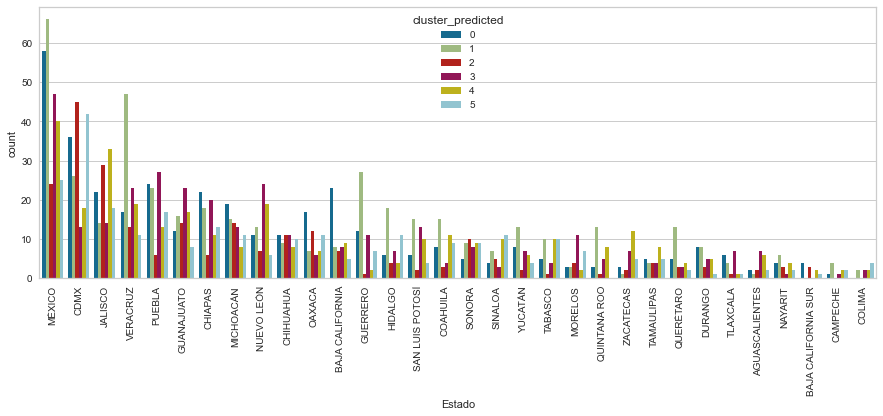

In [43]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Estado'], order = combinedDF['Estado'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

# Percepción gubernamental

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aprueba algo'),
  Text(1, 0, 'Aprueba mucho'),
  Text(2, 0, 'Desaprueba mucho'),
  Text(3, 0, 'Desaprueba algo'),
  Text(4, 0, ' Ns/nc')])

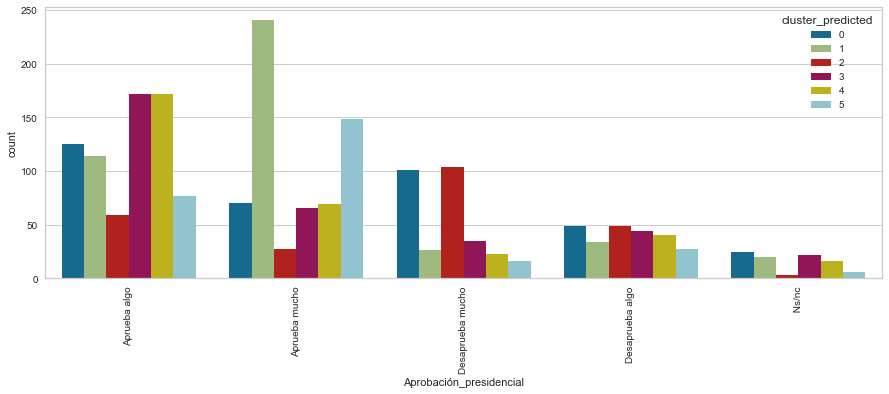

In [44]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Aprobación_presidencial'], order = combinedDF['Aprobación_presidencial'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aprueba algo'),
  Text(1, 0, 'Desaprueba mucho'),
  Text(2, 0, 'Desaprueba algo'),
  Text(3, 0, 'Aprueba mucho'),
  Text(4, 0, ' Ns/nc')])

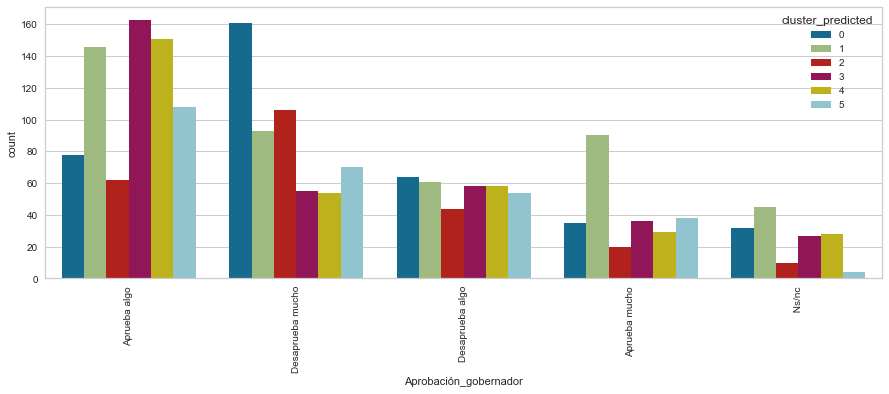

In [45]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Aprobación_gobernador'], order = combinedDF['Aprobación_gobernador'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

# Tendencia partidista.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Movimiento Regeneración Nacional (MORENA)'),
  Text(1, 0, 'No votó'),
  Text(2, 0, 'Partido Revolucionario Institucional (PRI)'),
  Text(3, 0, 'Partido Acción Nacional (PAN )'),
  Text(4, 0, 'No sabe'),
  Text(5, 0, 'No responde'),
  Text(6, 0, 'Partido de la Revolución Democrática (PRD)'),
  Text(7, 0, 'Movimiento Ciudadano (MC)'),
  Text(8, 0, 'Partido del Trabajo (PT)'),
  Text(9, 0, 'Anuló/Votó en blanco'),
  Text(10, 0, 'Partido Verde Ecologista de México (PVEM)'),
  Text(11, 0, 'El Bronco como independiente'),
  Text(12, 0, 'Nueva Alianza (PANAL)'),
  Text(13, 0, 'Otro, ¿cuál?'),
  Text(14, 0, 'Partido Encuentro Social (PES)')])

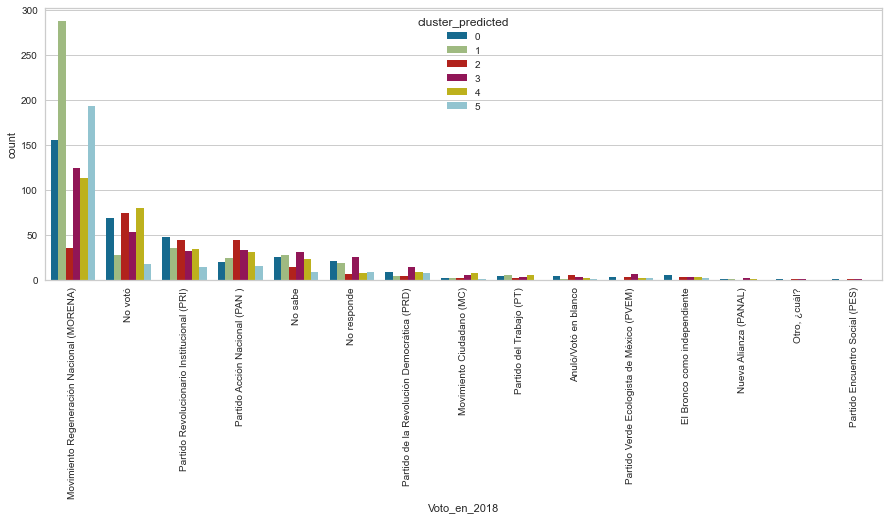

In [46]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Voto_en_2018'], order = combinedDF['Voto_en_2018'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mala'),
  Text(1, 0, 'Buena'),
  Text(2, 0, 'Muy mala'),
  Text(3, 0, ' Ns/nc'),
  Text(4, 0, 'Muy buena')])

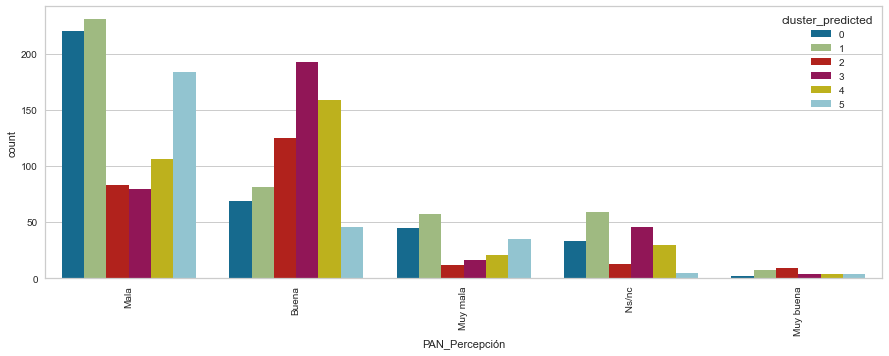

In [47]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['PAN_Percepción'], order = combinedDF['PAN_Percepción'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

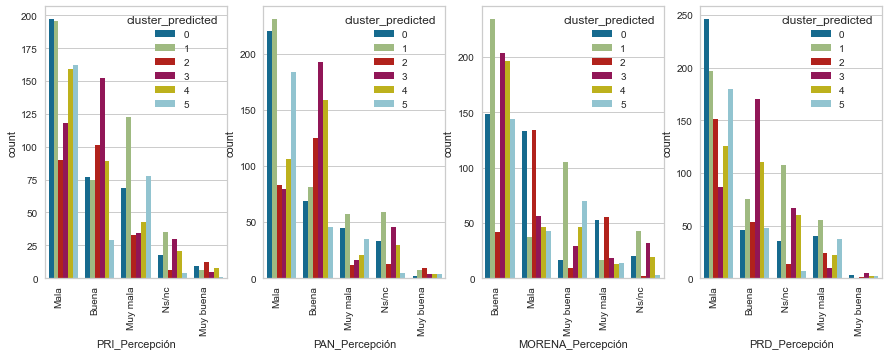

In [48]:
f, axs = plt.subplots(1,4, figsize=(15,5))

PRI_per = sns.countplot(x=combinedDF['PRI_Percepción'], order= combinedDF['PRI_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[0])
PAN_per = sns.countplot(x=combinedDF['PAN_Percepción'], order= combinedDF['PAN_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[1])
MORENA_per=sns.countplot(x=combinedDF['MORENA_Percepción'], order= combinedDF['MORENA_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[2])
PRD_per = sns.countplot(x=combinedDF['PRD_Percepción'], order= combinedDF['PRD_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[3])
PRI_per.set_xticklabels(PRI_per.get_xticklabels(), rotation=90, horizontalalignment='right')
PAN_per.set_xticklabels(PAN_per.get_xticklabels(), rotation=90, horizontalalignment='right')
MORENA_per.set_xticklabels(MORENA_per.get_xticklabels(), rotation=90, horizontalalignment='right')
PRD_per.set_xticklabels(PRD_per.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()




[Text(0, 0, 'Mala'),
 Text(1, 0, 'Buena'),
 Text(2, 0, ' Ns/nc'),
 Text(3, 0, 'Muy mala'),
 Text(4, 0, 'Muy buena')]

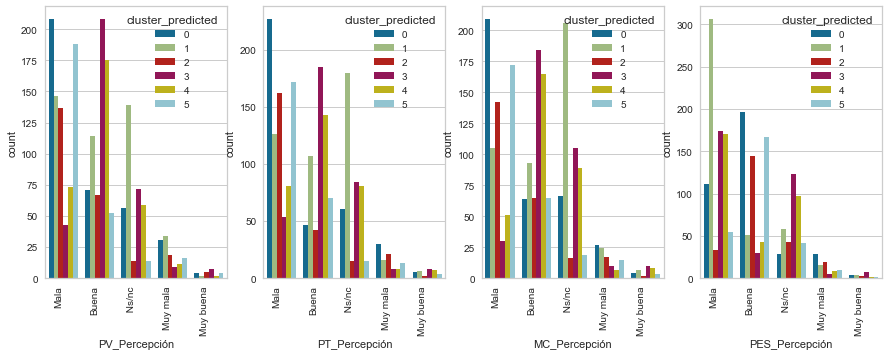

In [49]:
f, axs = plt.subplots(1,4, figsize=(15,5))
PV=sns.countplot(x=combinedDF['PV_Percepción'], order= combinedDF['PV_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[0])
PT_per= sns.countplot(x=combinedDF['PT_Percepción'], order= combinedDF['PT_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[1])
MC_per =sns.countplot(x=combinedDF['MC_Percepción'], order= combinedDF['MC_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[2])
PES_per= sns.countplot(x=combinedDF['PES_Percepción'], order= combinedDF['PES_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[3])
PV.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
PT_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
MC_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
PES_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, 'Mala'),
 Text(1, 0, 'Buena'),
 Text(2, 0, ' Ns/nc'),
 Text(3, 0, 'Muy mala'),
 Text(4, 0, 'Muy buena')]

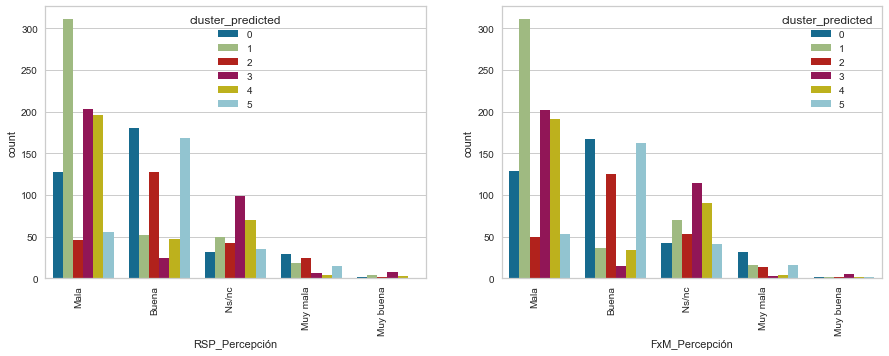

In [50]:
f, axs = plt.subplots(1,2, figsize=(15,5))
RSP_per=sns.countplot(x=combinedDF['RSP_Percepción'], order= combinedDF['RSP_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[0])
FXM_per= sns.countplot(x=combinedDF['FxM_Percepción'], order= combinedDF['FxM_Percepción'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[1])

RSP_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
FXM_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')

In [51]:
combinedDF[combinedDF['cluster_predicted']==4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 1978
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Estado                         320 non-null    object
 1   Municipio                      320 non-null    object
 2   Sexo                           320 non-null    object
 3   Bloque_edad                    320 non-null    object
 4   Aprobación_presidencial        320 non-null    object
 5   Aprobación_gobernador          320 non-null    object
 6   Voto_en_2018                   320 non-null    object
 7   PAN_Percepción                 320 non-null    object
 8   PRI_Percepción                 320 non-null    object
 9   PRD_Percepción                 320 non-null    object
 10  PV_Percepción                  320 non-null    object
 11  PT_Percepción                  320 non-null    object
 12  MC_Percepción                  320 non-null    object
 13  MORE

[Text(0, 0, 'Definitivamente no votaría'),
 Text(1, 0, 'Posiblemente sí votaría'),
 Text(2, 0, 'Posiblemente no votaría'),
 Text(3, 0, 'Definitivamente si votaría'),
 Text(4, 0, 'Ns/nc')]

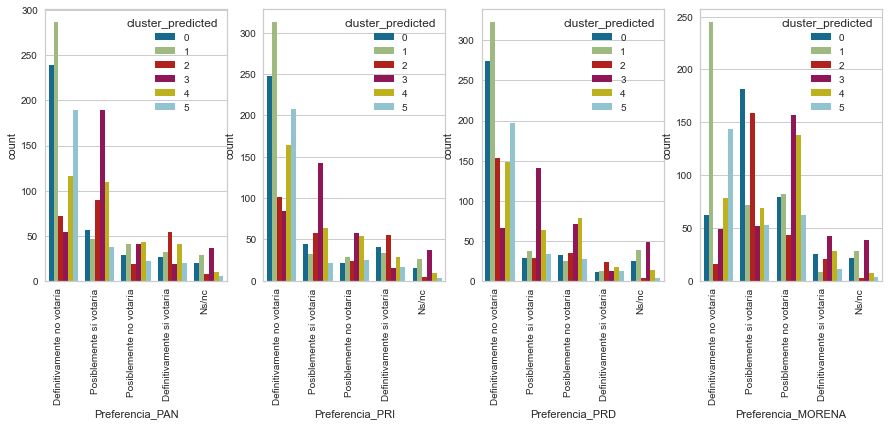

In [52]:
f, axs = plt.subplots(1,4, figsize=(15,5))
PV=sns.countplot(x=combinedDF['Preferencia_PAN'], order= combinedDF['Preferencia_PAN'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[0])
PT_per= sns.countplot(x=combinedDF['Preferencia_PRI'], order= combinedDF['Preferencia_PRI'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[1])
MC_per =sns.countplot(x=combinedDF['Preferencia_PRD'], order= combinedDF['Preferencia_PRI'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[2])
PES_per= sns.countplot(x=combinedDF['Preferencia_MORENA'], order= combinedDF['Preferencia_MORENA'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[3])
PV.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
PT_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
MC_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
PES_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')

[Text(0, 0, 'Definitivamente no votaría'),
 Text(1, 0, 'Posiblemente sí votaría'),
 Text(2, 0, 'Posiblemente no votaría'),
 Text(3, 0, 'Ns/nc'),
 Text(4, 0, 'Definitivamente si votaría')]

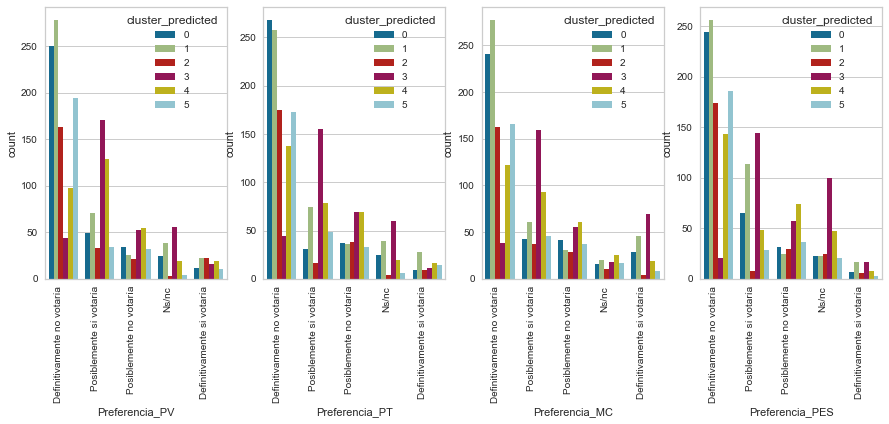

In [53]:
f, axs = plt.subplots(1,4, figsize=(15,5))
PV=sns.countplot(x=combinedDF['Preferencia_PV'], order= combinedDF['Preferencia_PV'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[0])
PT_per= sns.countplot(x=combinedDF['Preferencia_PT'], order= combinedDF['Preferencia_PT'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[1])
MC_per =sns.countplot(x=combinedDF['Preferencia_MC'], order= combinedDF['Preferencia_PRI'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[2])
PES_per= sns.countplot(x=combinedDF['Preferencia_PES'], order= combinedDF['Preferencia_PES'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[3])
PV.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
PT_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
MC_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
PES_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')

[Text(0, 0, 'Definitivamente no votaría'),
 Text(1, 0, 'Posiblemente sí votaría'),
 Text(2, 0, 'Posiblemente no votaría'),
 Text(3, 0, 'Ns/nc'),
 Text(4, 0, 'Definitivamente si votaría')]

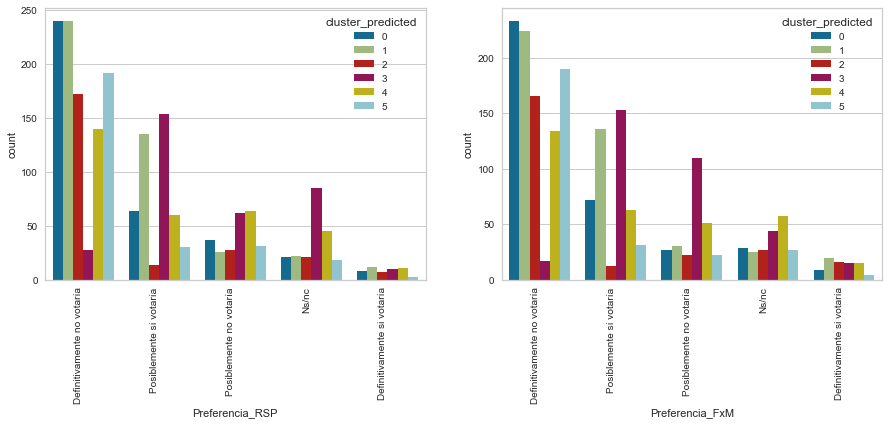

In [55]:
f, axs = plt.subplots(1,2, figsize=(15,5))
RSP_per=sns.countplot(x=combinedDF['Preferencia_RSP'], order= combinedDF['Preferencia_RSP'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[0])
FXM_per= sns.countplot(x=combinedDF['Preferencia_FxM'], order= combinedDF['Preferencia_FxM'].value_counts(). index, hue=combinedDF['cluster_predicted'], ax=axs[1])

RSP_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')
FXM_per.set_xticklabels(PV.get_xticklabels(), rotation=90, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Partido Revolucionario Institucional (PRI)'),
  Text(1, 0, 'Partido Acción Nacional (PAN)'),
  Text(2, 0, 'MORENA (Movimiento de Regeneración Nacional)'),
  Text(3, 0, 'No sabe'),
  Text(4, 0, 'Partido de la Revolución Democrática (PRD)'),
  Text(5, 0, 'Ninguno'),
  Text(6, 0, 'Partido del Trabajo (PT)'),
  Text(7, 0, 'Partido Verde Ecologista de México (PVEM)'),
  Text(8, 0, 'No responde'),
  Text(9, 0, 'Partido Encuentro Solidario (PES)'),
  Text(10, 0, 'Movimiento Ciudadano (MC)'),
  Text(11, 0, 'Redes Sociales Progresistas (RSP)'),
  Text(12, 0, 'Fuerza por México'),
  Text(13, 0, 'Otro, ¿cuál?')])

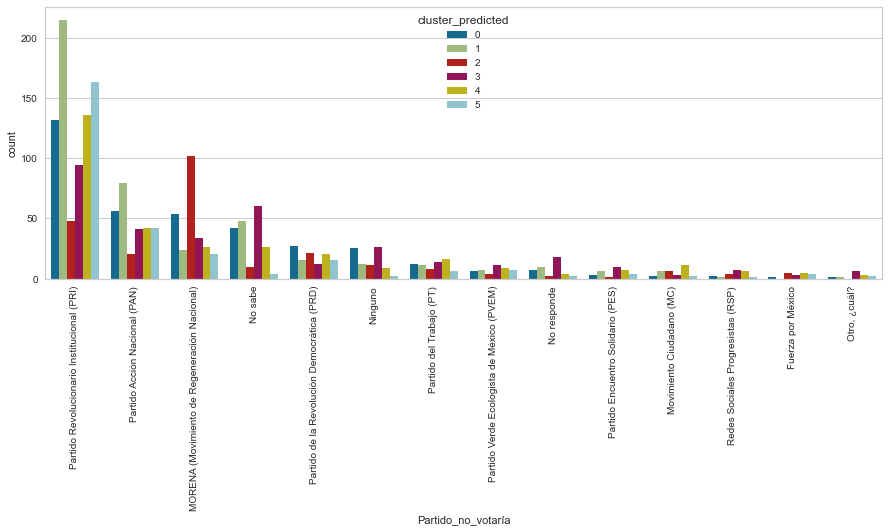

In [56]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Partido_no_votaría'], order = combinedDF['Partido_no_votaría'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Muy MORENA'),
  Text(1, 0, 'Ninguno o independiente'),
  Text(2, 0, 'Algo MORENA'),
  Text(3, 0, 'Algo panista'),
  Text(4, 0, 'Algo priista'),
  Text(5, 0, 'Muy priista'),
  Text(6, 0, 'Muy panista'),
  Text(7, 0, 'No responde'),
  Text(8, 0, 'Algo Movimiento Ciudadano'),
  Text(9, 0, 'Algo Verde Ecologista'),
  Text(10, 0, 'Muy Verde Ecologista'),
  Text(11, 0, 'Algo perredista'),
  Text(12, 0, 'Muy perredista'),
  Text(13, 0, 'Algo PT-ista'),
  Text(14, 0, 'Muy Movimiento Ciudadano'),
  Text(15, 0, 'Muy PT-ista'),
  Text(16, 0, 'Algo Fuerza por México'),
  Text(17, 0, 'Algo Partido Encuentro Solidario'),
  Text(18, 0, 'Muy Partido Encuentro Solidario'),
  Text(19, 0, 'Muy Redes Sociales Progresistas'),
  Text(20, 0, 'Muy Fuerza por México'),
  Text(21, 0, 'Otro, ¿cuál?'),
  Text(22, 0, 'Algo Redes Sociales Progresistas')])

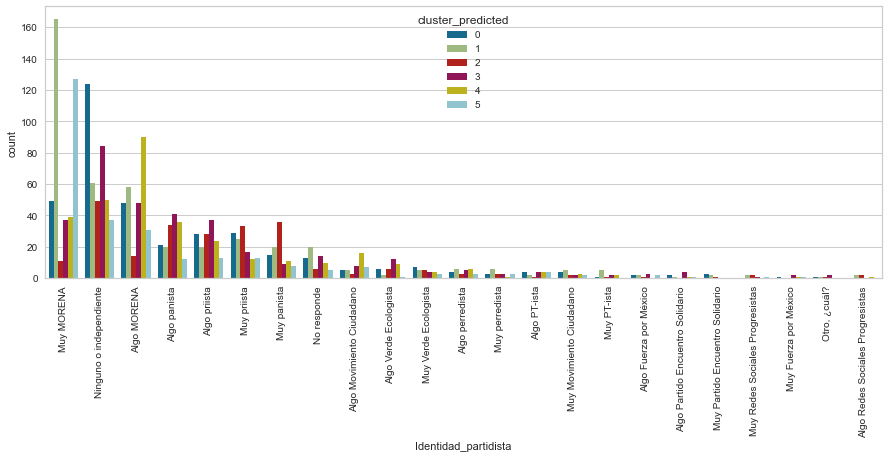

In [57]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Identidad_partidista'], order = combinedDF['Identidad_partidista'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

# NIvel de participación

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Estoy totalmente seguro/a de ir a votar'),
  Text(1, 0, 'Es altamente probable que vaya a votar'),
  Text(2, 0, 'Es poco probable que vaya a votar'),
  Text(3, 0, 'No voy a ir a votar'),
  Text(4, 0, ' No sabe'),
  Text(5, 0, ' No responde')])

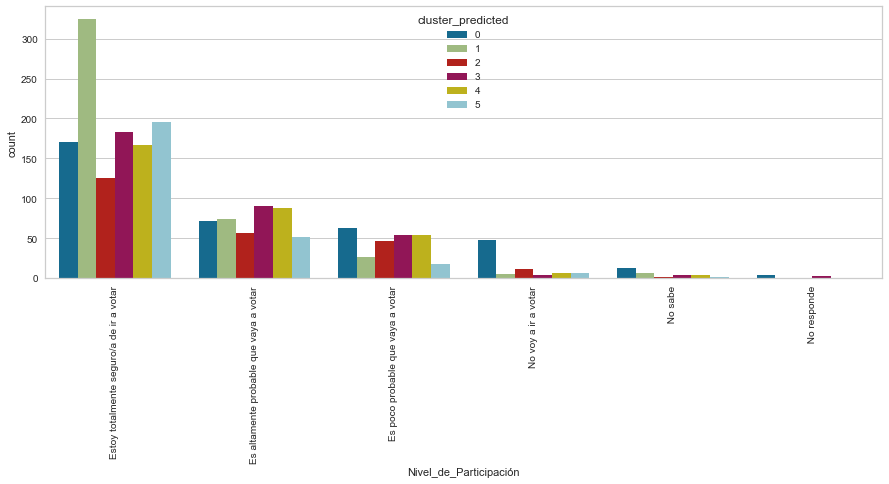

In [58]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Nivel_de_Participación'], order = combinedDF['Nivel_de_Participación'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

In [59]:
combinedDF[combinedDF['cluster_predicted']==3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 7 to 1977
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Estado                         339 non-null    object
 1   Municipio                      339 non-null    object
 2   Sexo                           339 non-null    object
 3   Bloque_edad                    339 non-null    object
 4   Aprobación_presidencial        339 non-null    object
 5   Aprobación_gobernador          339 non-null    object
 6   Voto_en_2018                   339 non-null    object
 7   PAN_Percepción                 339 non-null    object
 8   PRI_Percepción                 339 non-null    object
 9   PRD_Percepción                 339 non-null    object
 10  PV_Percepción                  339 non-null    object
 11  PT_Percepción                  339 non-null    object
 12  MC_Percepción                  339 non-null    object
 13  MORE

# Confianza en medios de comunicación

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nada'),
  Text(1, 0, 'Poco'),
  Text(2, 0, 'Algo'),
  Text(3, 0, 'Mucho'),
  Text(4, 0, ' Ns/nc')])

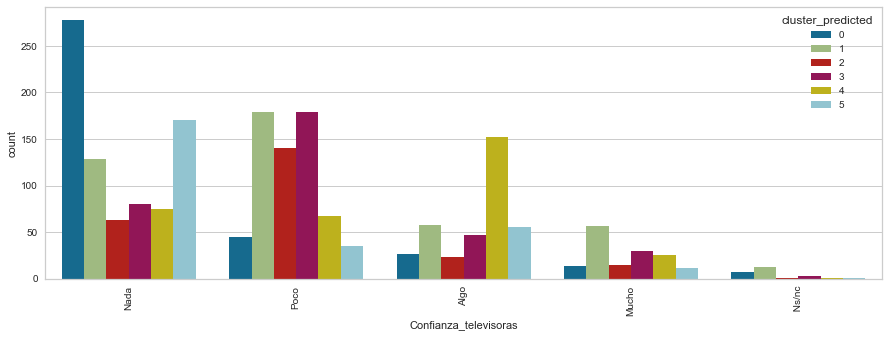

In [60]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_televisoras'], order = combinedDF['Confianza_televisoras'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Poco'),
  Text(1, 0, 'Nada'),
  Text(2, 0, 'Algo'),
  Text(3, 0, 'Mucho'),
  Text(4, 0, ' Ns/nc')])

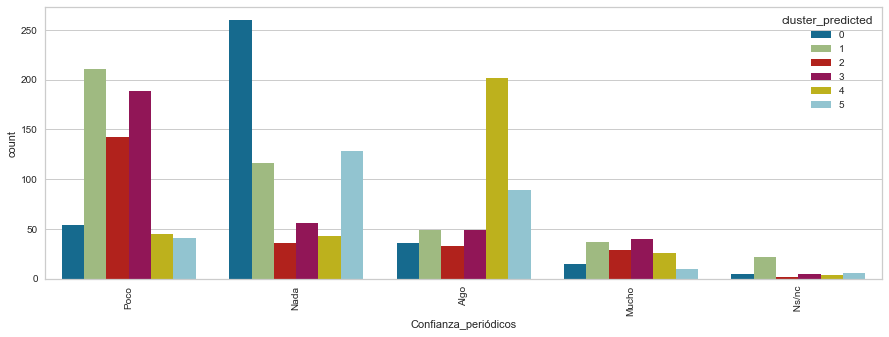

In [61]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_periódicos'], order = combinedDF['Confianza_periódicos'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Poco'),
  Text(1, 0, 'Nada'),
  Text(2, 0, 'Algo'),
  Text(3, 0, 'Mucho'),
  Text(4, 0, ' Ns/nc')])

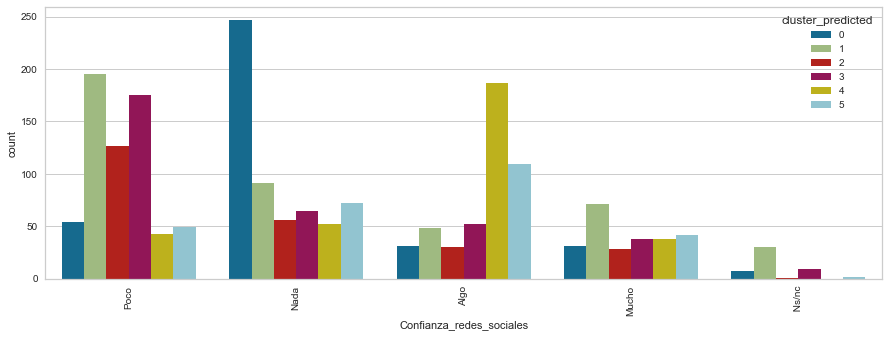

In [62]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_redes_sociales'], order = combinedDF['Confianza_redes_sociales'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

# Confianza institucional 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Poco'),
  Text(1, 0, 'Algo'),
  Text(2, 0, 'Nada'),
  Text(3, 0, 'Mucho'),
  Text(4, 0, ' Ns/nc')])

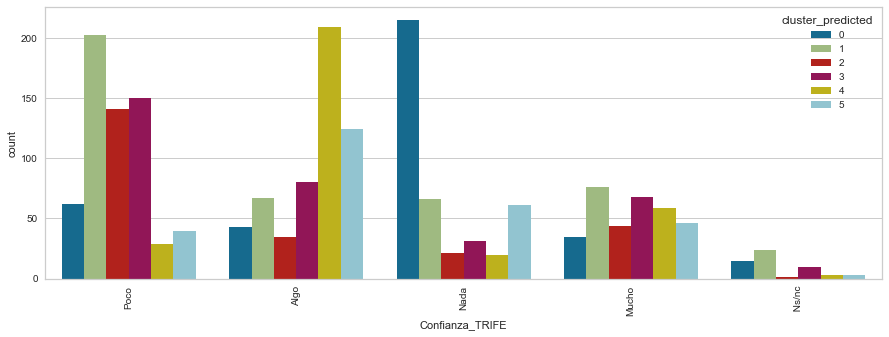

In [64]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_TRIFE'], order = combinedDF['Confianza_TRIFE'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Poco'),
  Text(1, 0, 'Algo'),
  Text(2, 0, 'Mucho'),
  Text(3, 0, 'Nada'),
  Text(4, 0, ' Ns/nc')])

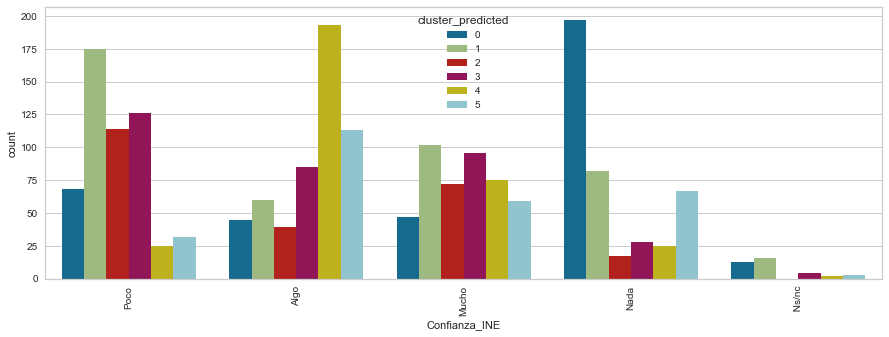

In [65]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_INE'], order = combinedDF['Confianza_INE'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nada'),
  Text(1, 0, 'Poco'),
  Text(2, 0, 'Algo'),
  Text(3, 0, 'Mucho'),
  Text(4, 0, ' Ns/nc')])

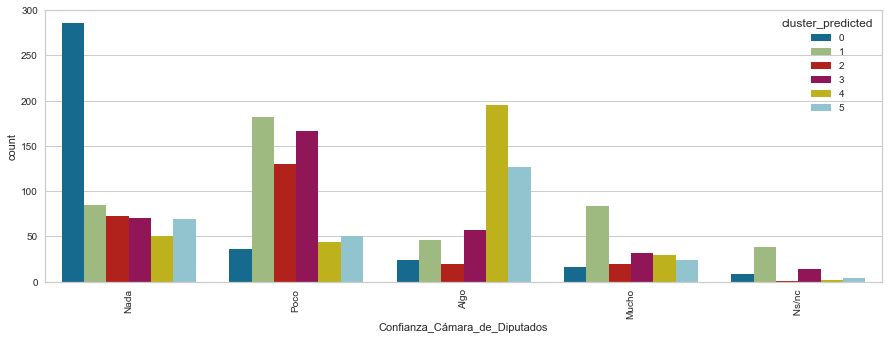

In [66]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_Cámara_de_Diputados'], order = combinedDF['Confianza_Cámara_de_Diputados'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mucho'),
  Text(1, 0, 'Poco'),
  Text(2, 0, 'Algo'),
  Text(3, 0, 'Nada'),
  Text(4, 0, ' Ns/nc')])

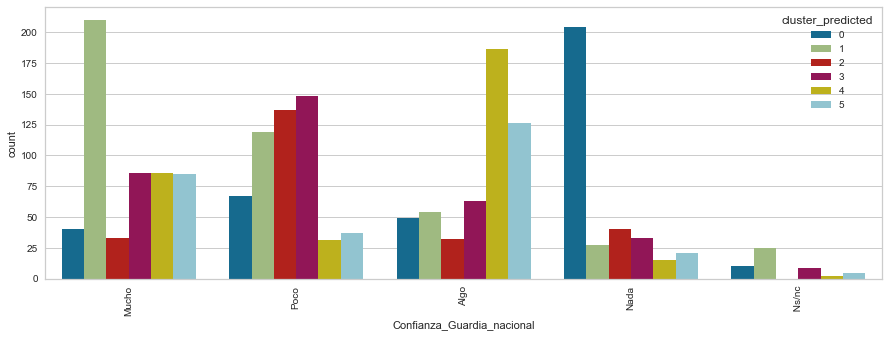

In [67]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_Guardia_nacional'], order = combinedDF['Confianza_Guardia_nacional'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mucho'),
  Text(1, 0, 'Algo'),
  Text(2, 0, 'Poco'),
  Text(3, 0, 'Nada'),
  Text(4, 0, ' Ns/nc')])

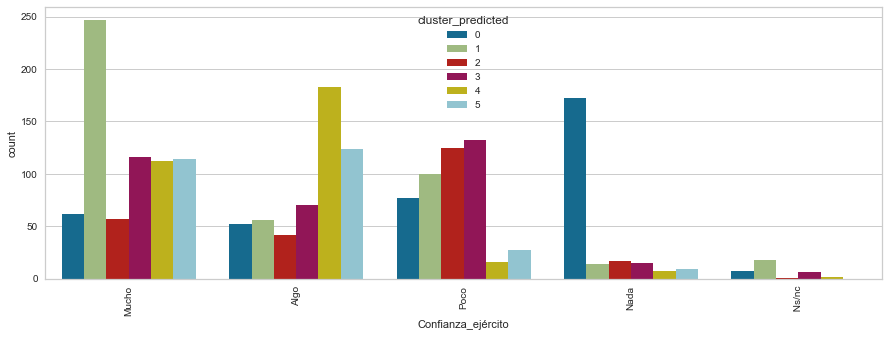

In [68]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_ejército'], order = combinedDF['Confianza_ejército'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nada'),
  Text(1, 0, 'Poco'),
  Text(2, 0, 'Algo'),
  Text(3, 0, 'Mucho'),
  Text(4, 0, ' Ns/nc')])

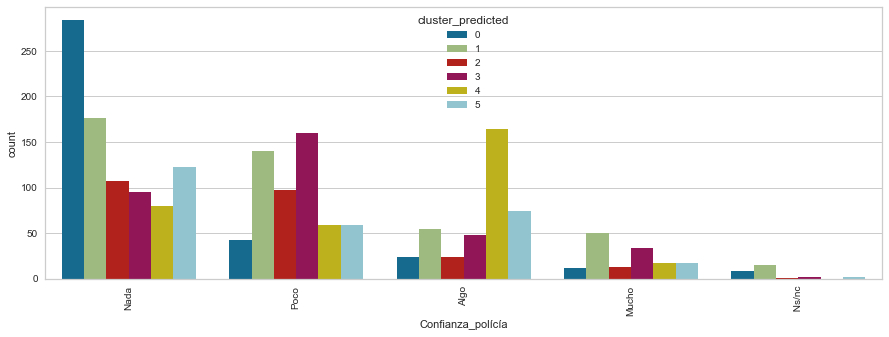

In [69]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_polícía'], order = combinedDF['Confianza_polícía'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nada'),
  Text(1, 0, 'Poco'),
  Text(2, 0, 'Algo'),
  Text(3, 0, 'Mucho'),
  Text(4, 0, ' Ns/nc')])

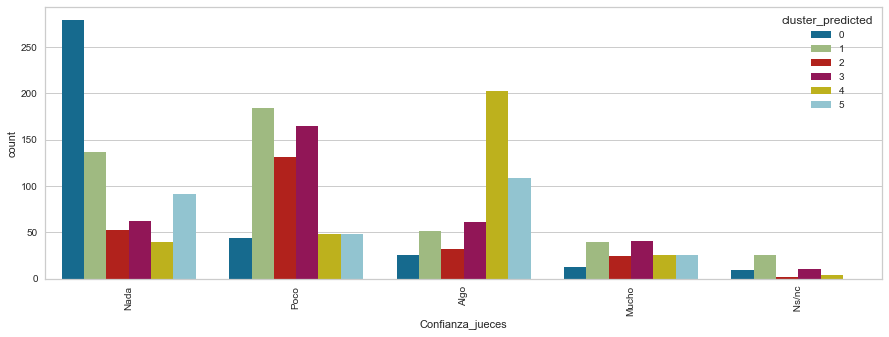

In [70]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Confianza_jueces'], order = combinedDF['Confianza_jueces'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

# Utilización de redes sociales

(array([0, 1, 2]), [Text(0, 0, 'Sí'), Text(1, 0, 'No'), Text(2, 0, 'Ns/nc')])

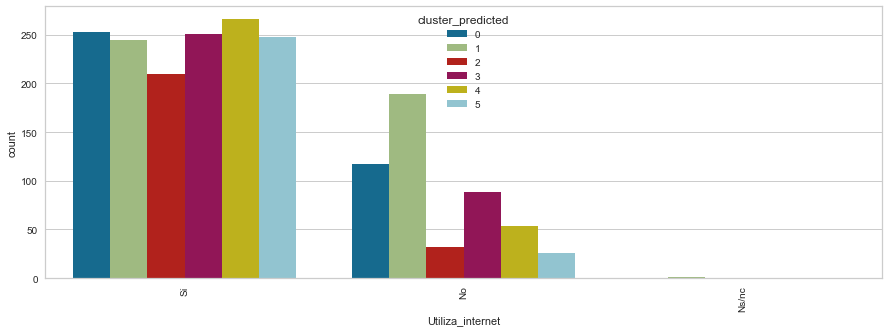

In [71]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Utiliza_internet'], order = combinedDF['Utiliza_internet'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'No'), Text(1, 0, 'Sí'), Text(2, 0, 'Ns/nc')])

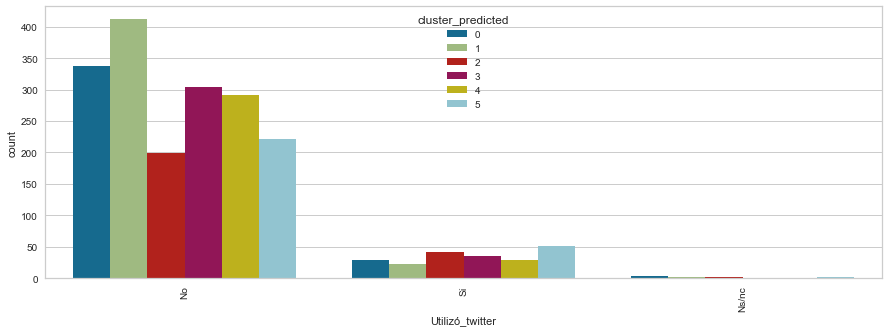

In [72]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Utilizó_twitter'], order = combinedDF['Utilizó_twitter'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'Sí'), Text(1, 0, 'No'), Text(2, 0, 'Ns/nc')])

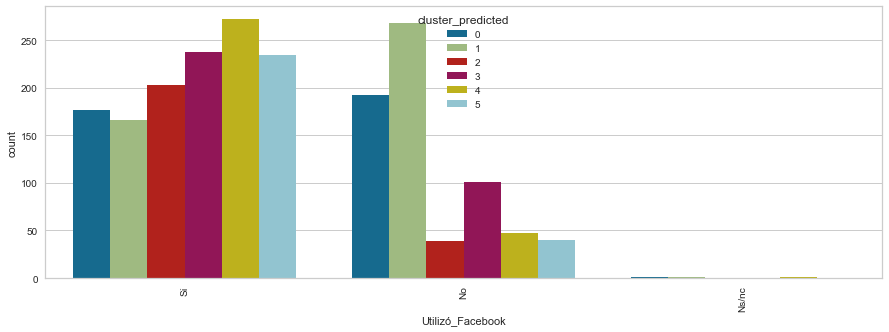

In [73]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Utilizó_Facebook'], order = combinedDF['Utilizó_Facebook'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'No'), Text(1, 0, 'Sí'), Text(2, 0, 'Ns/nc')])

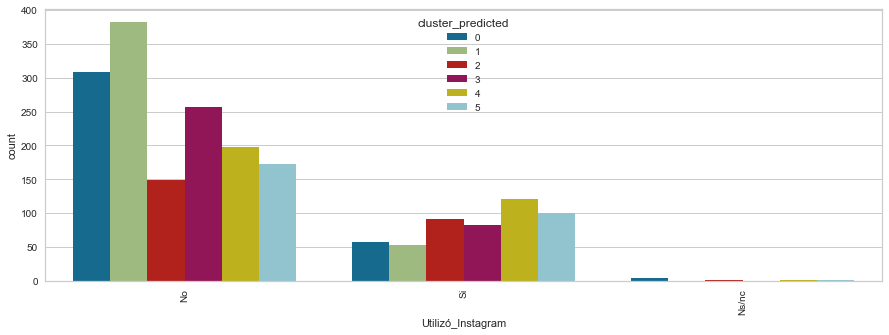

In [74]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Utilizó_Instagram'], order = combinedDF['Utilizó_Instagram'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'Sí'), Text(1, 0, 'No'), Text(2, 0, 'Ns/nc')])

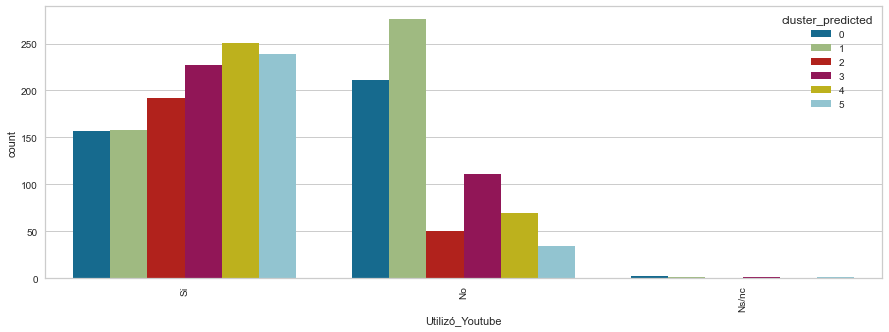

In [75]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Utilizó_Youtube'], order = combinedDF['Utilizó_Youtube'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'Sí'), Text(1, 0, 'No'), Text(2, 0, 'Ns/nc')])

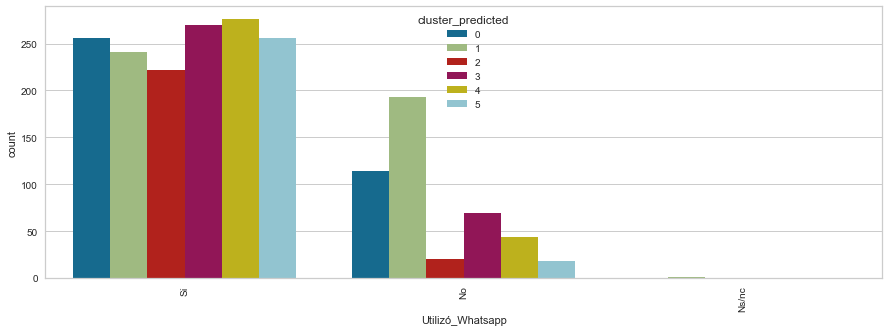

In [76]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Utilizó_Whatsapp'], order = combinedDF['Utilizó_Whatsapp'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

# Datos socioeconóimcos

(array([0, 1, 2]), [Text(0, 0, 'No'), Text(1, 0, 'Sí'), Text(2, 0, 'Ns/nc')])

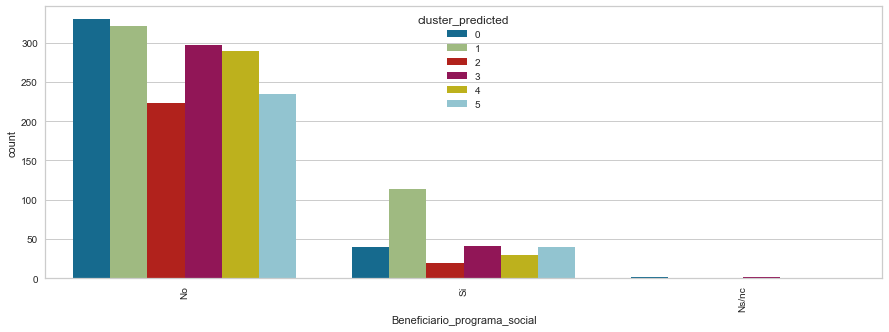

In [77]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Beneficiario_programa_social'], order = combinedDF['Beneficiario_programa_social'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Secundaria completa'),
  Text(1, 0, 'Preparatoria completa'),
  Text(2, 0, 'Primaria completa'),
  Text(3, 0, 'Licenciatura completa'),
  Text(4, 0, 'Primaria incompleta'),
  Text(5, 0, 'Licenciatura incompleta'),
  Text(6, 0, 'Preparatoria incompleta'),
  Text(7, 0, 'Carrera técnica completa'),
  Text(8, 0, 'Secundaria incompleta'),
  Text(9, 0, 'Nada'),
  Text(10, 0, 'Posgrado'),
  Text(11, 0, 'Carrera técnica incompleta'),
  Text(12, 0, 'No responde')])

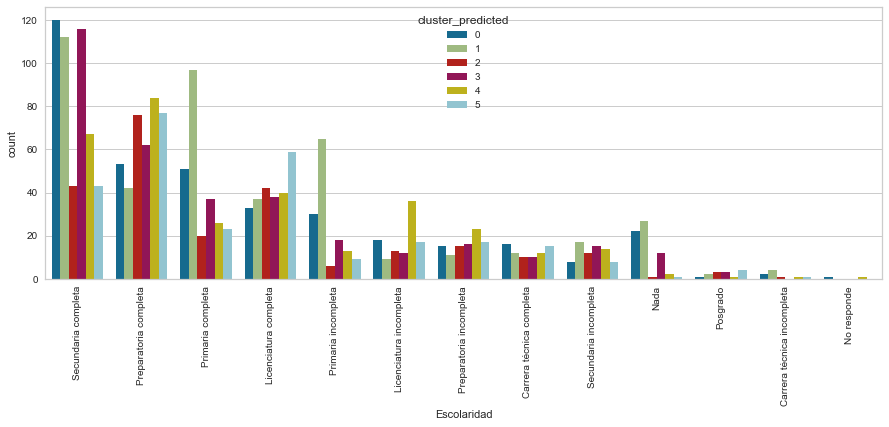

In [78]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Escolaridad'], order = combinedDF['Escolaridad'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Ama de casa'),
  Text(1, 0, 'Trabajador por cuenta propia'),
  Text(2, 0, 'Trabajador en sector privado'),
  Text(3, 0, 'Comerciante'),
  Text(4, 0, 'Estudiante'),
  Text(5, 0, 'Otra (especificar)'),
  Text(6, 0, 'Trabajador en el gobierno'),
  Text(7, 0, 'Jubilado o pensionado'),
  Text(8, 0, 'Desempleado'),
  Text(9, 0, 'Profesionista independiente'),
  Text(10, 0, 'Ama de casa con trabajo de medio tiempo'),
  Text(11, 0, ' No responde'),
  Text(12, 0, 'Empresario')])

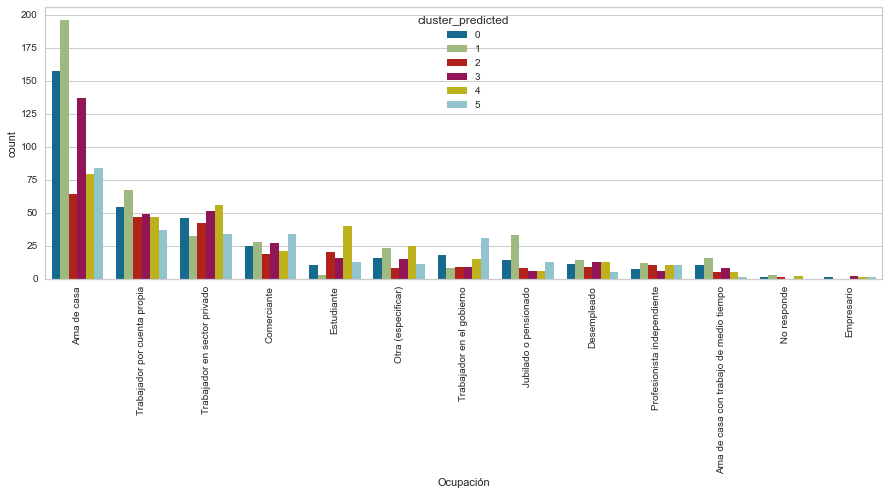

In [79]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Ocupación'], order = combinedDF['Ocupación'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Casada/o'),
  Text(1, 0, 'Soltera/o'),
  Text(2, 0, 'Unión Libre'),
  Text(3, 0, 'Viuda/o'),
  Text(4, 0, 'Divorciada/o'),
  Text(5, 0, 'No responde')])

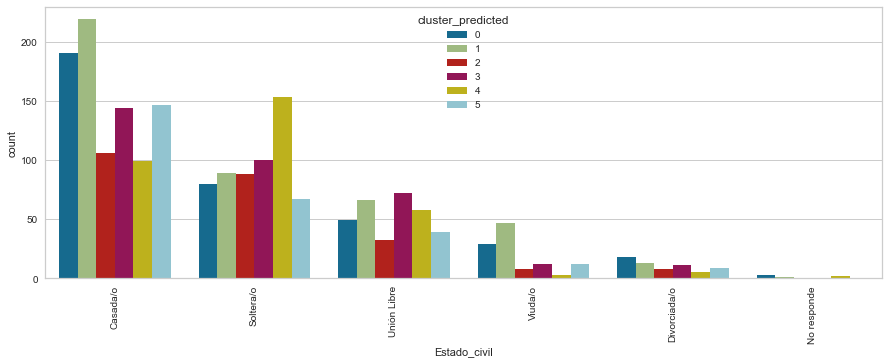

In [80]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Estado_civil'], order = combinedDF['Estado_civil'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'Sí'), Text(1, 0, 'No'), Text(2, 0, 'Ns/nc')])

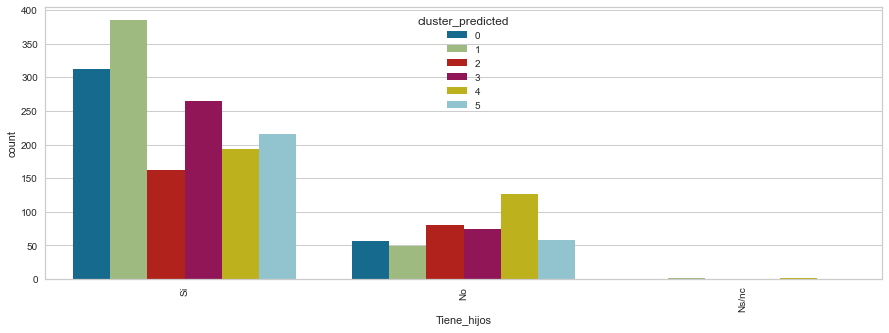

In [81]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Tiene_hijos'], order = combinedDF['Tiene_hijos'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Femenino'), Text(1, 0, 'Masculino')])

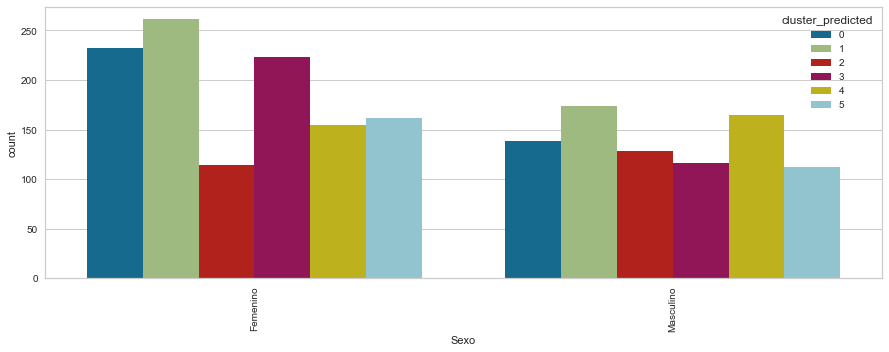

In [82]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Sexo'], order = combinedDF['Sexo'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'De 46 a 60 años'),
  Text(1, 0, 'De 26 a 35 años'),
  Text(2, 0, 'De 18 a 25 años'),
  Text(3, 0, 'De 36 a 45 años'),
  Text(4, 0, 'Más de 60 años')])

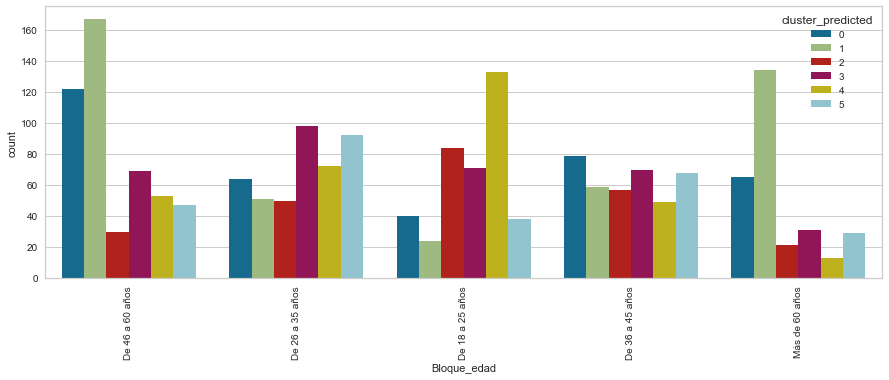

In [83]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['Bloque_edad'], order = combinedDF['Bloque_edad'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)

In [84]:
combinedDF[combinedDF['cluster_predicted']==5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 3 to 1976
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Estado                         274 non-null    object
 1   Municipio                      274 non-null    object
 2   Sexo                           274 non-null    object
 3   Bloque_edad                    274 non-null    object
 4   Aprobación_presidencial        274 non-null    object
 5   Aprobación_gobernador          274 non-null    object
 6   Voto_en_2018                   274 non-null    object
 7   PAN_Percepción                 274 non-null    object
 8   PRI_Percepción                 274 non-null    object
 9   PRD_Percepción                 274 non-null    object
 10  PV_Percepción                  274 non-null    object
 11  PT_Percepción                  274 non-null    object
 12  MC_Percepción                  274 non-null    object
 13  MORE

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'D'),
  Text(1, 0, 'D+'),
  Text(2, 0, 'C-'),
  Text(3, 0, 'C'),
  Text(4, 0, 'C+'),
  Text(5, 0, 'No responde'),
  Text(6, 0, 'E'),
  Text(7, 0, 'AB')])

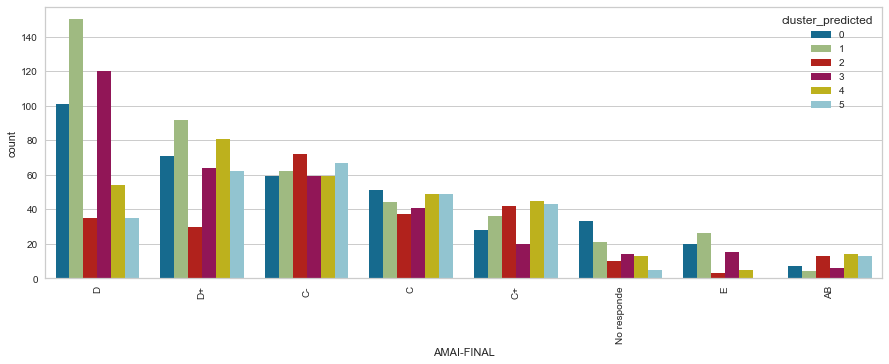

In [85]:
plt.subplots(figsize=(15,5))
sns.countplot(x=combinedDF['AMAI-FINAL'], order = combinedDF['AMAI-FINAL'].value_counts().index,hue=combinedDF['cluster_predicted'])
plt.xticks(rotation=90)